# Homework 1 - data plotting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import odr
import numpy as np

In [2]:
# setting matplotlib to use LaTeX packages
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['font.size'] = 22
plt.rcParams['figure.figsize'] = (10,6)
plt.rc('text', usetex=True)

## EXR 3

In [3]:
# I/O management
PREFIX_INPUT = "./data/"
PREFIX_OUTPUT = "./tex/img/"

fname_benchmarks = PREFIX_INPUT  + "O{}.bench"
fname_plots      = PREFIX_OUTPUT + "{}" + '.pdf'

do_writeplot = True

In [4]:
optimizations = ['0', '1', '2', '3', '5'] # set here the optimizations tested
temp_df = []

for op in optimizations:
    print("retrieve O{}".format(op))
    tdf = pd.read_csv( fname_benchmarks.format(op),
                       names = ['dim','loop RbC','loop CbR','loop JKI','matmul'] )
    tdf['opti'] = int(op)
    temp_df.append(tdf)

df = pd.concat(temp_df)
df

retrieve O0
retrieve O1
retrieve O2
retrieve O3
retrieve O5


,dim,loop RbC,loop CbR,loop JKI,matmul,opti
0,100,0.002555,0.002679,0.002384,0.000078,0
1,200,0.020666,0.020289,0.019078,0.000491,0
2,300,0.070139,0.068748,0.064363,0.001563,0
3,400,0.166308,0.164046,0.152528,0.003518,0
4,500,0.319830,0.318583,0.294771,0.006534,0
...,...,...,...,...,...,...
23,6000,457.806180,483.216160,26.999663,11.185117,5
24,7000,786.525030,845.839170,42.003841,17.281080,5
25,8000,1223.863900,1370.433100,60.979463,26.565964,5
26,9000,1922.590100,2105.521100,89.732895,37.191722,5


### making plots

fit coeffs [ 2.77284866e-09  7.35807555e-07 -5.32117171e-03  3.69723338e+00]
------------------------------


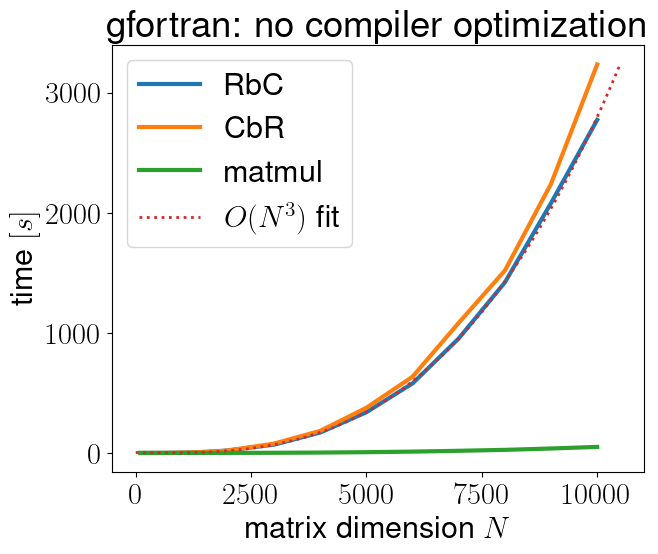

In [5]:
no_opti = df[ df['opti']==0 ]

ax = no_opti.plot( x = 'dim', y = ['loop RbC','loop CbR','matmul'],  
                label = ['RbC','CbR','matmul'], figsize=(7,6), 
                linewidth=3 )
ax.set( xlabel='matrix dimension $N$', ylabel='time $[s]$',
        title = 'gfortran: no compiler optimization')

# fit O(n^3) ------------
output = np.polyfit(no_opti['dim'], no_opti['loop RbC'], 3)
poly = np.poly1d(output)
print('fit coeffs', output)
print('-'*30)

x = np.arange(0, 1.05*no_opti['dim'].max(), 10)
plt.plot(x, poly(x), ':', label="$O(N^3)$ fit", linewidth=2, zorder=3)
plt.legend()
plt.tight_layout()

if do_writeplot: plt.savefig( fname_plots.format("std_scaling") )

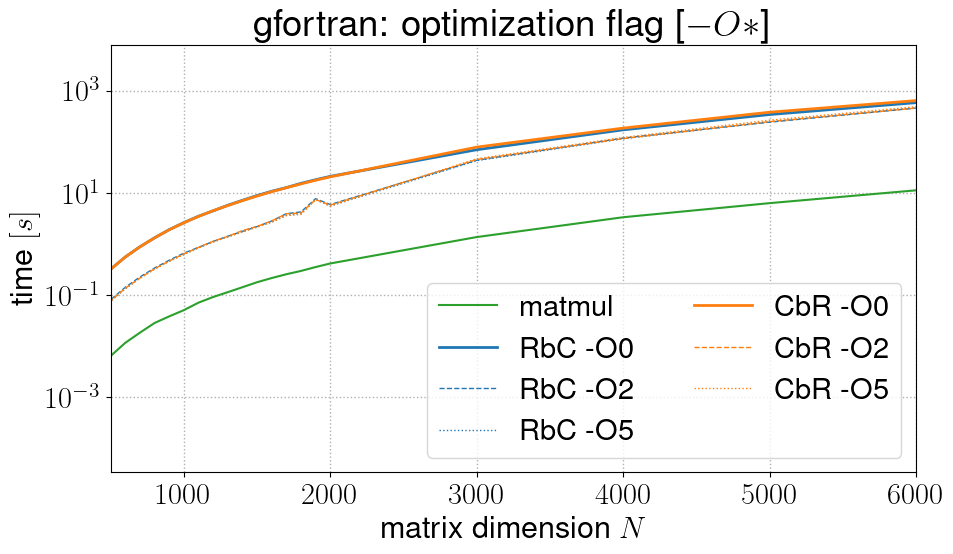

In [6]:
# reference: matmul & worse timing for any loop
ax = df[ df['opti'] == 5 ].plot(x='dim',   y='matmul', label='matmul', color='tab:green')

ax = df[ df['opti'] == 0 ].plot(x='dim', y='loop RbC', label='RbC -O0', color='tab:blue', ax=ax, linewidth=2)
ax = df[ df['opti'] == 2 ].plot(x='dim', y='loop RbC', label='RbC -O2', color='tab:blue', style= '--', ax=ax, linewidth=1)
ax = df[ df['opti'] == 5 ].plot(x='dim', y='loop RbC', label='RbC -O5', color='tab:blue', style= ':', ax=ax, linewidth=1)

ax = df[ df['opti'] == 0 ].plot(x='dim', y='loop CbR', label='CbR -O0', color='tab:orange', ax=ax, linewidth=2)
ax = df[ df['opti'] == 2 ].plot(x='dim', y='loop CbR', label='CbR -O2', color='tab:orange',  style= '--', ax=ax, linewidth=1)
ax = df[ df['opti'] == 5 ].plot(x='dim', y='loop CbR', label='CbR -O5', color='tab:orange',  style= ':', ax=ax,
                                linewidth=1, logy=True)

plt.legend(ncol=2, prop={'size': 21})

# change properties
ax.set(xlabel = 'matrix dimension $N$', ylabel = 'time $[s]$',
       title = "gfortran: optimization flag [$-O*$]", xlim=[500,6000])
ax.grid('on',  linestyle=':', linewidth=1)
plt.yticks()
plt.tight_layout()

if do_writeplot: plt.savefig( fname_plots.format("unoptimized_scaling"), transparent=True)

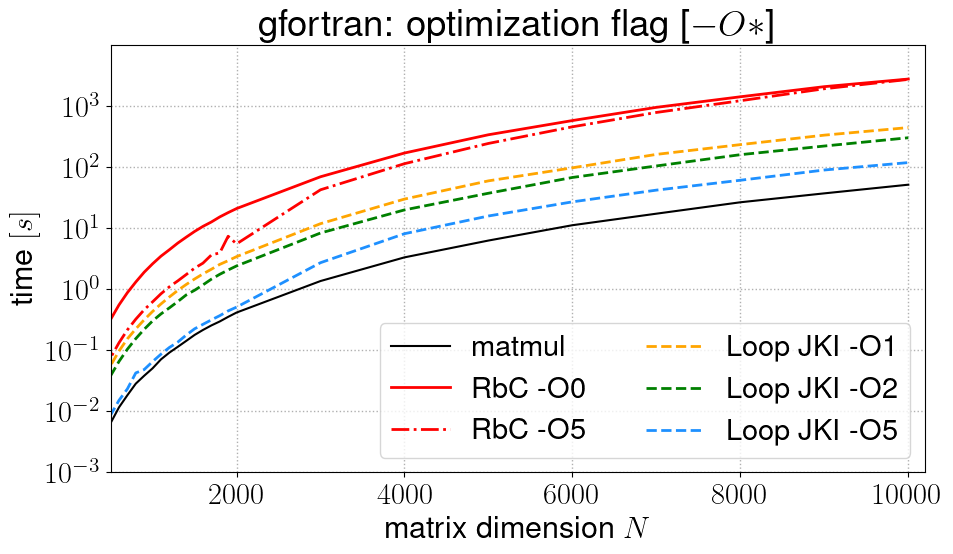

In [7]:
# reference: matmul & worse timing for any loop
ax = df[ df['opti'] == 5 ].plot(x='dim', y = 'matmul', label='matmul', color='k')
ax = df[ df['opti'] == 0 ].plot(x='dim', y='loop RbC', label='RbC -O0', color='red', ax=ax, linewidth=2) # these curves are all almost the same
ax = df[ df['opti'] == 5 ].plot(x='dim', y='loop RbC', label='RbC -O5', color='red', style= '-.',  ax=ax, linewidth=2)

# benchmark with opti
ax = df[ df['opti'] == 1 ].plot(x='dim', y='loop JKI', label='Loop JKI -O1', color='orange', style= '--', ax=ax, linewidth=2)
ax = df[ df['opti'] == 2 ].plot(x='dim', y='loop JKI', label='Loop JKI -O2', color='green',  style= '--', ax=ax, linewidth=2)
ax = df[ df['opti'] == 5 ].plot(x='dim', y='loop JKI', label='Loop JKI -O5', color='dodgerblue', style= '--', 
                                ax=ax, linewidth=2, logy=True)

plt.legend(ncol=2, prop={'size': 21})

# change properties
ax.set(xlabel = 'matrix dimension $N$', ylabel = 'time $[s]$',
       title = "gfortran: optimization flag [$-O*$]", xlim=[500, 10200], ylim=[10**-3,10**4])
ax.grid('on',  linestyle=':', linewidth=1)
plt.yticks(10.0**np.arange(-3,4,1))
plt.tight_layout()

if do_writeplot: plt.savefig( fname_plots.format("optimized_scaling"), transparent=True)

## EXR 1

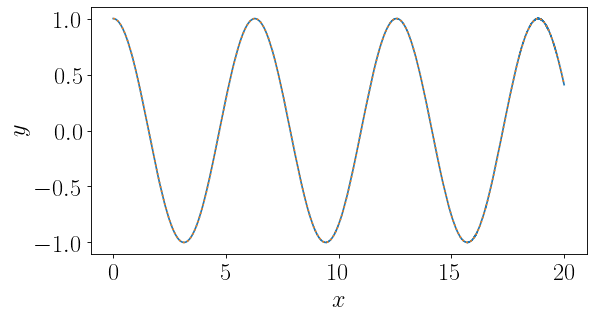

In [20]:
# EXR1 test
dy = np.loadtxt('data/dy.txt')

plt.figure(figsize=(8, 4), dpi=80)
plt.plot( np.arange(20000-4)*0.001, dy)
plt.plot(np.arange(20000-4)*0.001, np.cos(np.arange(20000-4)*0.001), ':')

plt.xlabel('$x$')
plt.ylabel('$y$')


if do_writeplot: plt.savefig( fname_plots.format("exr1_test") )